<a href="https://colab.research.google.com/github/haridarsan01/machine_learning/blob/main/gini_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/facebook and compaign .csv")

In [ ]:
col = list(df.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for m in col:
  df[m]=labelencoder.fit_transform(df[m])
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,0,0,0,5,0,32,62,11,14,17,664,1,47,2,1
1,1,0,0,5,1,32,62,12,16,21,787,2,73,2,0
2,2,0,0,5,2,32,62,16,22,22,427,0,0,1,0
3,3,13,13,5,3,32,62,24,29,32,590,1,31,1,0
4,4,0,0,5,3,32,62,24,30,32,589,1,35,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1138,2,2,4,488,10,11,57,417,155,377,13,77,24,15
1139,1139,2,2,4,488,11,11,59,357,100,301,3,0,24,15
1140,1140,2,2,4,488,12,13,60,205,28,152,2,0,24,15
1141,1141,0,0,4,488,14,14,60,380,108,315,8,77,24,15


In [ ]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,0,0,0,5,0,32,62,11,14,17,664,1,47,2,1
1,1,0,0,5,1,32,62,12,16,21,787,2,73,2,0
2,2,0,0,5,2,32,62,16,22,22,427,0,0,1,0
3,3,13,13,5,3,32,62,24,29,32,590,1,31,1,0
4,4,0,0,5,3,32,62,24,30,32,589,1,35,1,1


In [ ]:
df.tail()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
1138,1138,2,2,4,488,10,11,57,417,155,377,13,77,24,15
1139,1139,2,2,4,488,11,11,59,357,100,301,3,0,24,15
1140,1140,2,2,4,488,12,13,60,205,28,152,2,0,24,15
1141,1141,0,0,4,488,14,14,60,380,108,315,8,77,24,15
1142,1142,0,0,4,488,15,16,61,334,97,295,5,77,24,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ad_id                1143 non-null   int64
 1   reporting_start      1143 non-null   int64
 2   reporting_end        1143 non-null   int64
 3   campaign_id          1143 non-null   int64
 4   fb_campaign_id       1143 non-null   int64
 5   age                  1143 non-null   int64
 6   gender               1143 non-null   int64
 7   interest1            1143 non-null   int64
 8   interest2            1143 non-null   int64
 9   interest3            1143 non-null   int64
 10  impressions          1143 non-null   int64
 11  clicks               1143 non-null   int64
 12  spent                1143 non-null   int64
 13  total_conversion     1143 non-null   int64
 14  approved_conversion  1143 non-null   int64
dtypes: int64(15)
memory usage: 134.1 KB


In [ ]:
df.shape

(1143, 15)

In [ ]:
df.describe()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,571.000000,6.018373,6.018373,3.567804,353.650919,30.093613,50.980752,22.912511,95.776903,37.465442,559.935258,9.826772,127.411199,9.343832,5.510936
std,330.099985,3.873505,3.873505,2.443494,153.298342,9.397664,17.312305,13.044087,120.484639,32.319340,324.673198,17.922574,153.762476,10.628658,6.830421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.500000,3.000000,3.000000,1.000000,230.500000,29.500000,39.000000,12.000000,19.000000,19.000000,281.500000,1.000000,0.000000,1.000000,0.000000
50%,571.000000,6.000000,6.000000,4.000000,426.000000,32.000000,61.000000,22.000000,30.000000,27.000000,557.000000,2.000000,57.000000,2.000000,1.000000
75%,856.500000,9.000000,9.000000,6.000000,488.000000,37.000000,62.000000,28.000000,144.500000,38.000000,839.500000,8.000000,226.500000,24.000000,15.000000
max,1142.000000,13.000000,13.000000,6.000000,489.000000,43.000000,62.000000,63.000000,430.000000,167.000000,1125.000000,96.000000,508.000000,24.000000,15.000000


In [ ]:
df.nunique()

ad_id                  1143
reporting_start          14
reporting_end            14
campaign_id               7
fb_campaign_id          490
age                      44
gender                   63
interest1                64
interest2               431
interest3               168
impressions            1126
clicks                   97
spent                   509
total_conversion         25
approved_conversion      16
dtype: int64

In [ ]:
df.isnull().sum()

ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [ ]:
df.isnull()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


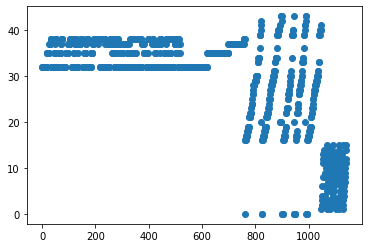

In [ ]:
plt.scatter(df.ad_id,df.age)
plt.show()

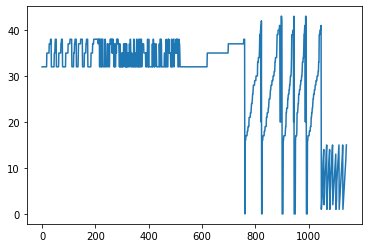

In [ ]:
plt.plot(df.ad_id,df.age)
plt.show()

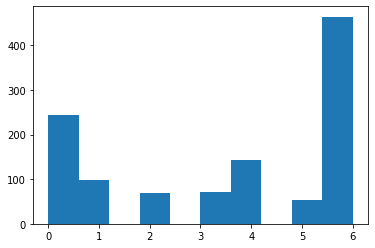

In [ ]:
plt.hist(df.campaign_id)
plt.show()

In [ ]:
x=df.drop('approved_conversion',axis=1)
y=df['approved_conversion']

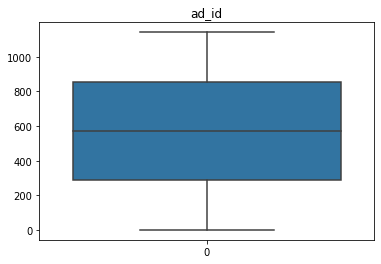

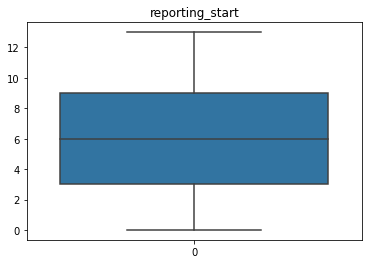

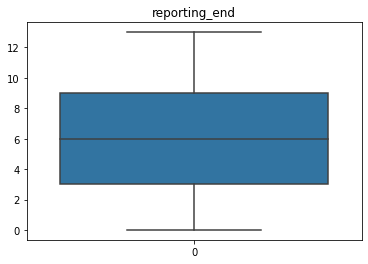

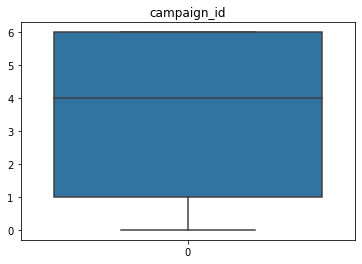

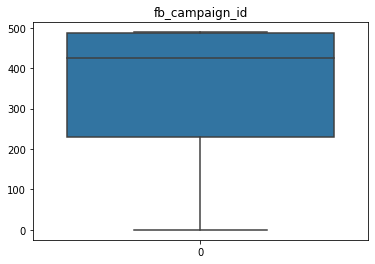

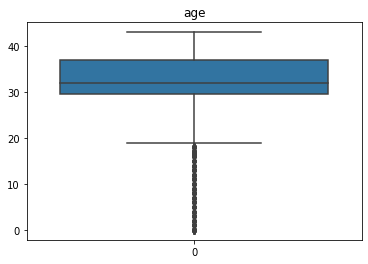

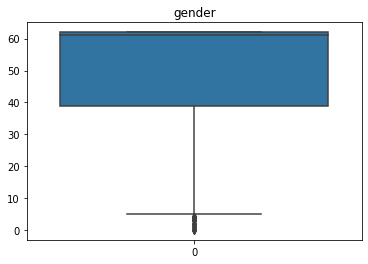

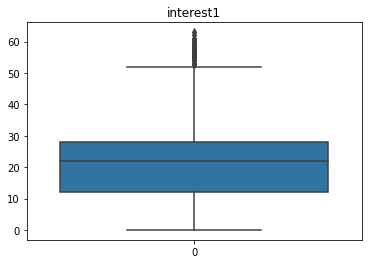

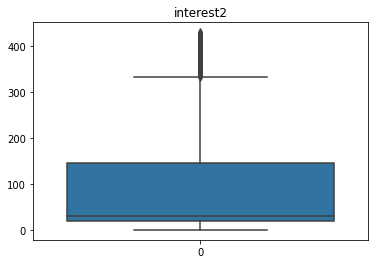

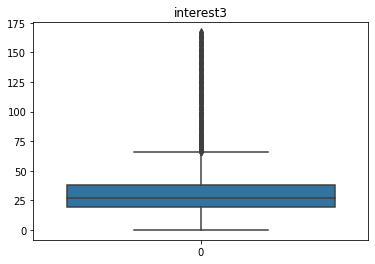

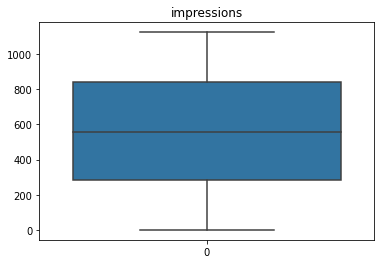

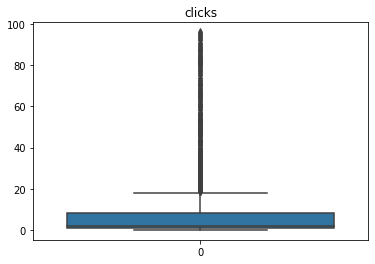

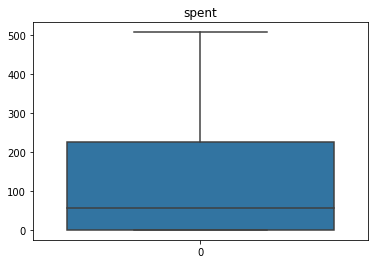

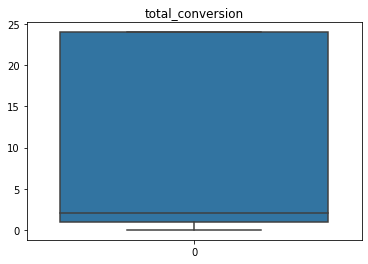

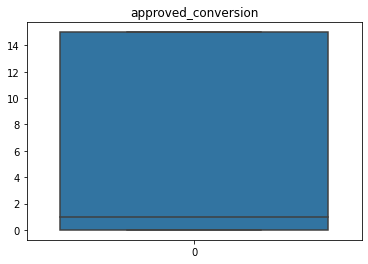

In [ ]:
for j in col:
  sns.boxplot(df[j])
  plt.title(j)
  plt.show()

In [ ]:
x.head(3)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion
0,0,0,0,5,0,32,62,11,14,17,664,1,47,2
1,1,0,0,5,1,32,62,12,16,21,787,2,73,2
2,2,0,0,5,2,32,62,16,22,22,427,0,0,1


In [ ]:
y.head(3)

0    1
1    0
2    0
Name: approved_conversion, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)


In [ ]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[123,  83,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 86,  48,   6,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  3,  13,   2,   2,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   2,   1,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6223776223776224

In [ ]:
import graphviz

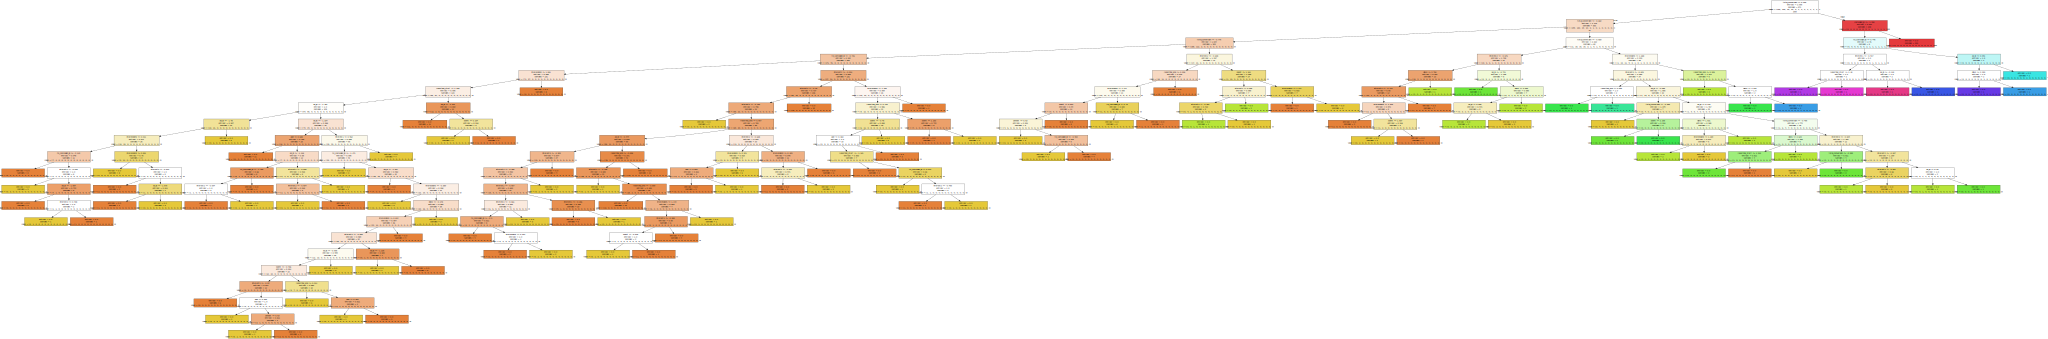

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True,))